In [6]:
# src/main.py
import sys
import os


# Assuming the notebook is in the same directory as `src`
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))


from src.preprocessing import *
from src.modeling import *
from src.visualization import *
import argparse
import pandas as pd
import joblib


Mappings:

Overfitting detected. Applying dimensionality reduction...
Reduction in model complexity, iteration: 0


/home/gisam1/miniconda3/envs/forest/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.945e-01, tolerance: 2.960e-02
  model = cd_fast.enet_coordinate_descent(



Metrics after dimensionality reduction:
Mean test MSE: 0.36
Mean test MAE: 0.47
Mean test R²: 0.29
Reduction in model complexity, iteration: 1

Metrics after dimensionality reduction:
Mean test MSE: 0.36
Mean test MAE: 0.47
Mean test R²: 0.29
Reduction in model complexity, iteration: 2

Metrics after dimensionality reduction:
Mean test MSE: 0.36
Mean test MAE: 0.47
Mean test R²: 0.30
Reduction in model complexity, iteration: 3

Metrics after dimensionality reduction:
Mean test MSE: 0.36
Mean test MAE: 0.47
Mean test R²: 0.30
Reduction in model complexity, iteration: 4

Metrics after dimensionality reduction:
Mean test MSE: 0.37
Mean test MAE: 0.48
Mean test R²: 0.29


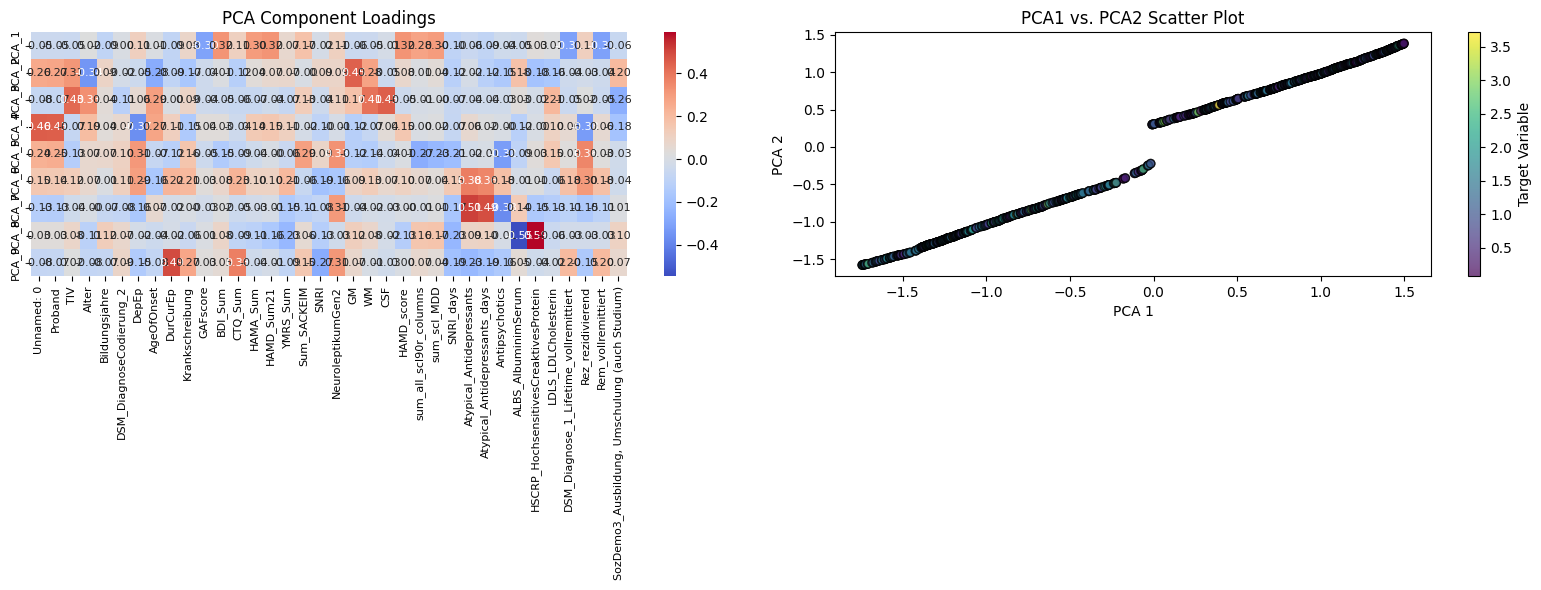

Mean Overall test MSE: 0.37
Mean Overall test MAE: 0.48
Mean Overall test R²: 0.29
Overall MSE: 0.39
Overall MAE: 0.49
Overall R²: 0.22

Correlation metrics on test set:
R² (Pearson squared): 0.4084
Spearman coefficient: 0.6177
P-value (Spearman): 0.0000


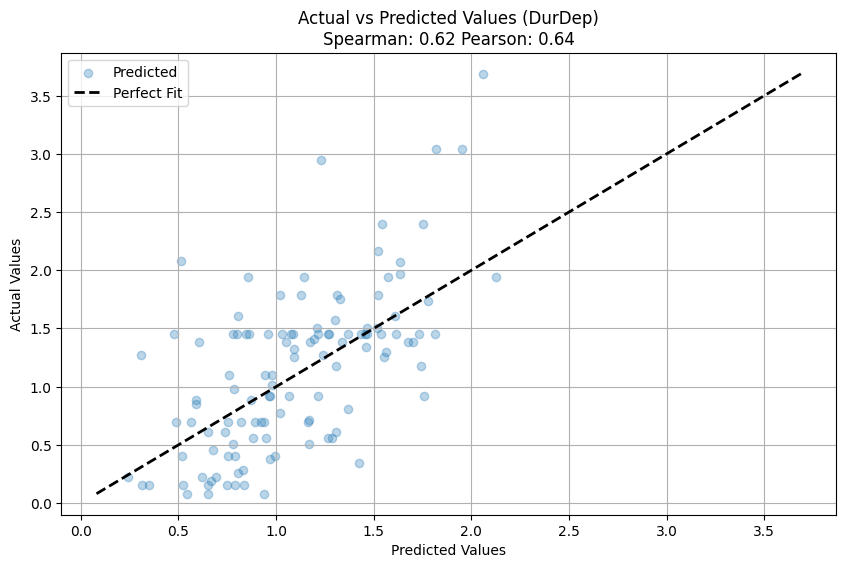

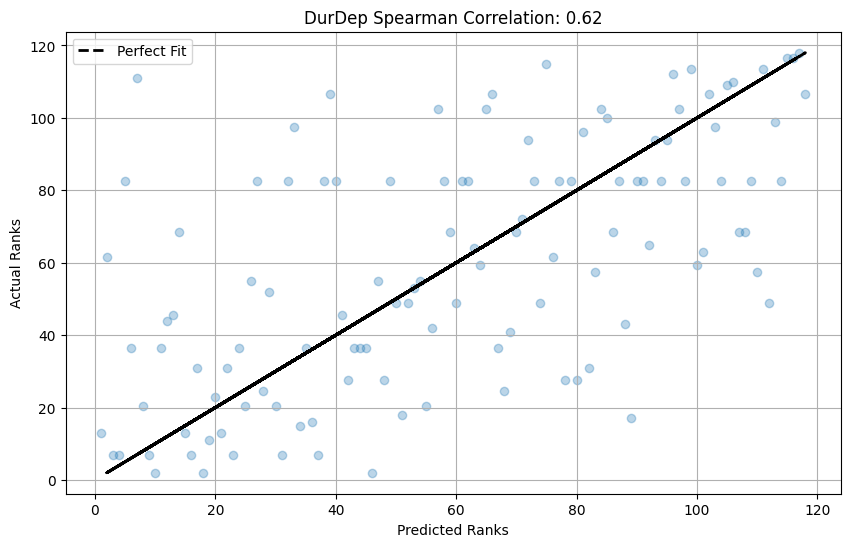

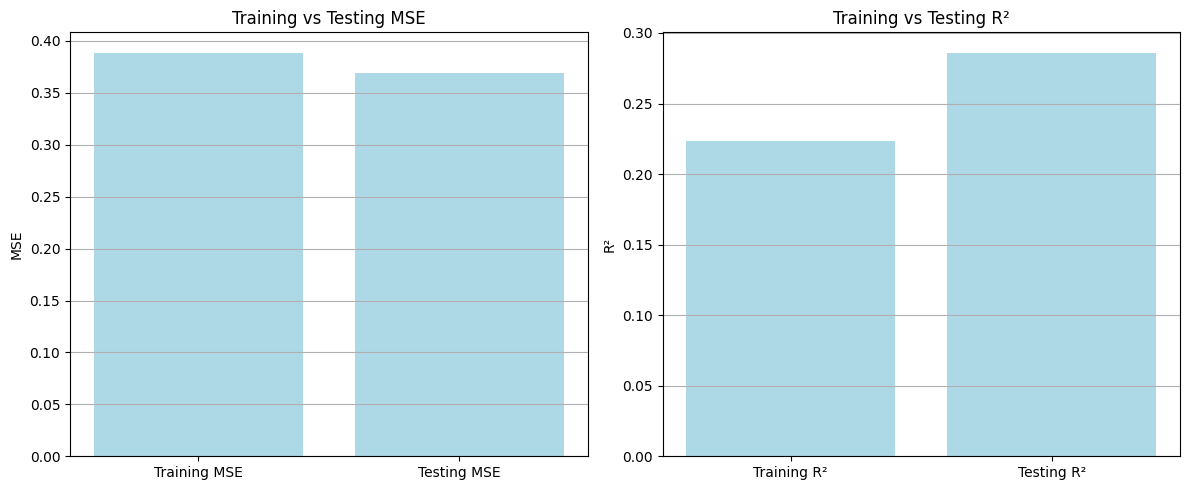

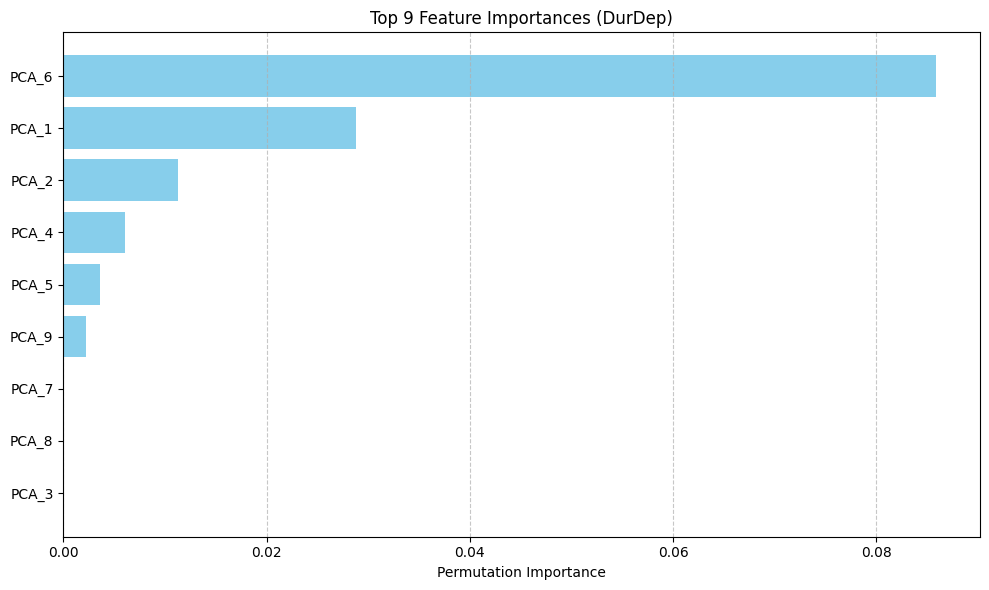

Examining Titanic Dataset: 
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
Mappings:
Mean Overall test F1 score: 0.81
Overall F1 score: 0.85


<Figure size 800x600 with 0 Axes>

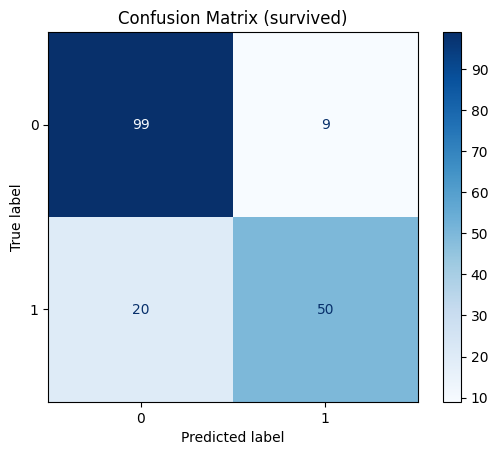

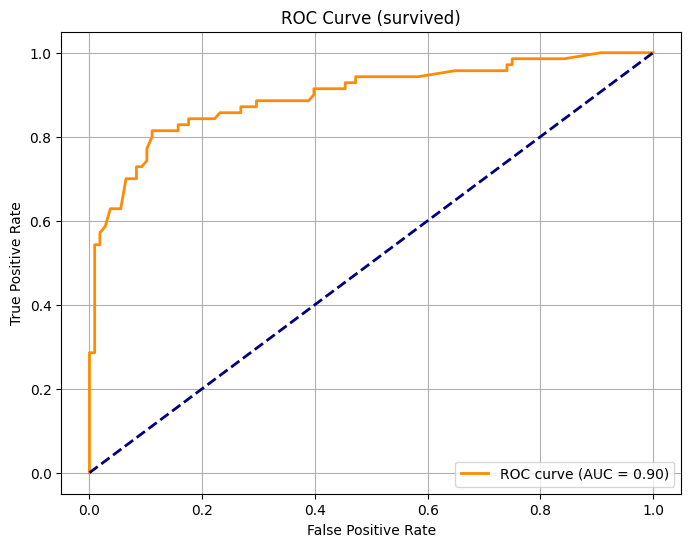

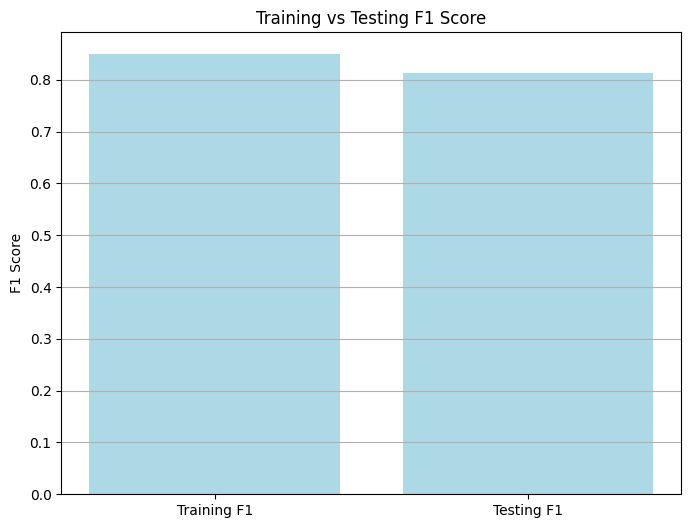

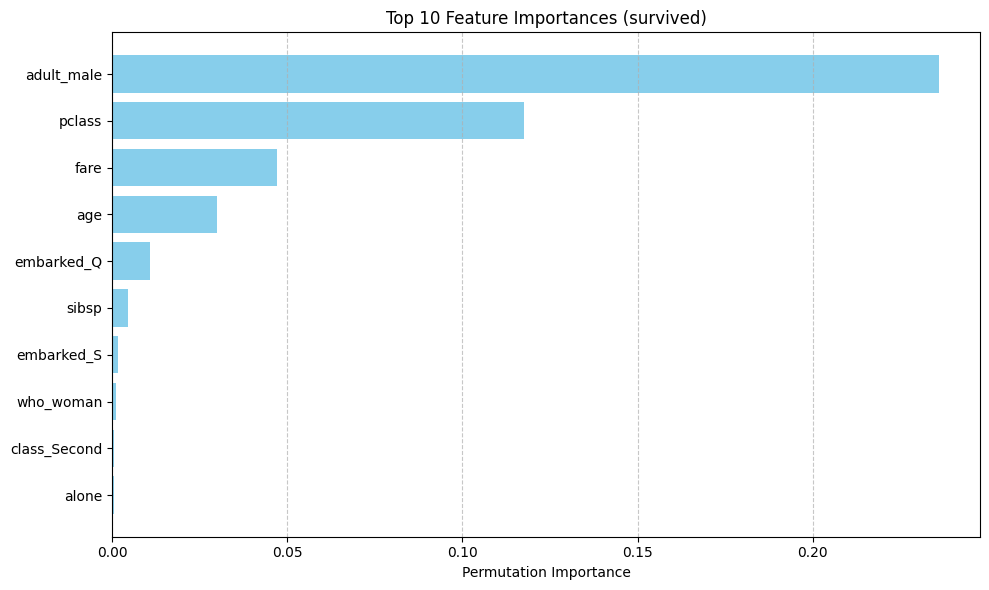

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')
(150, 5)
Mappings:
Mean Overall test F1 score: 0.94
Overall F1 score: 0.96


<Figure size 800x600 with 0 Axes>

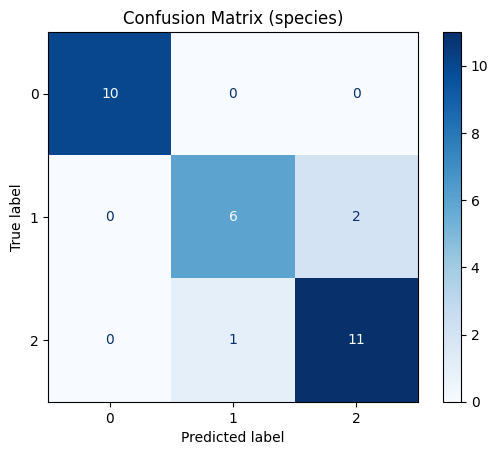

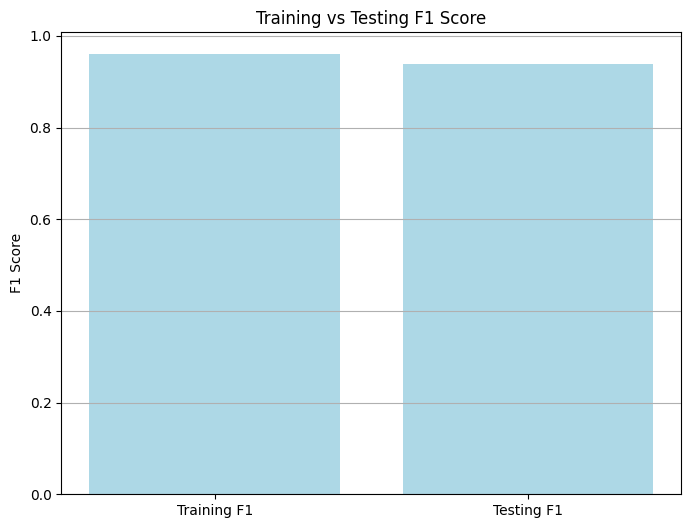

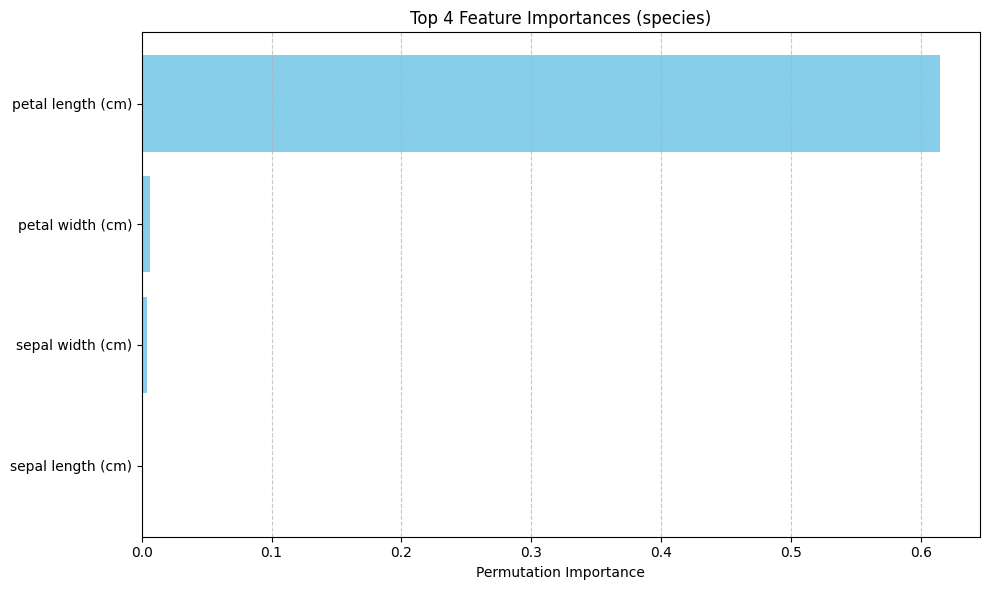

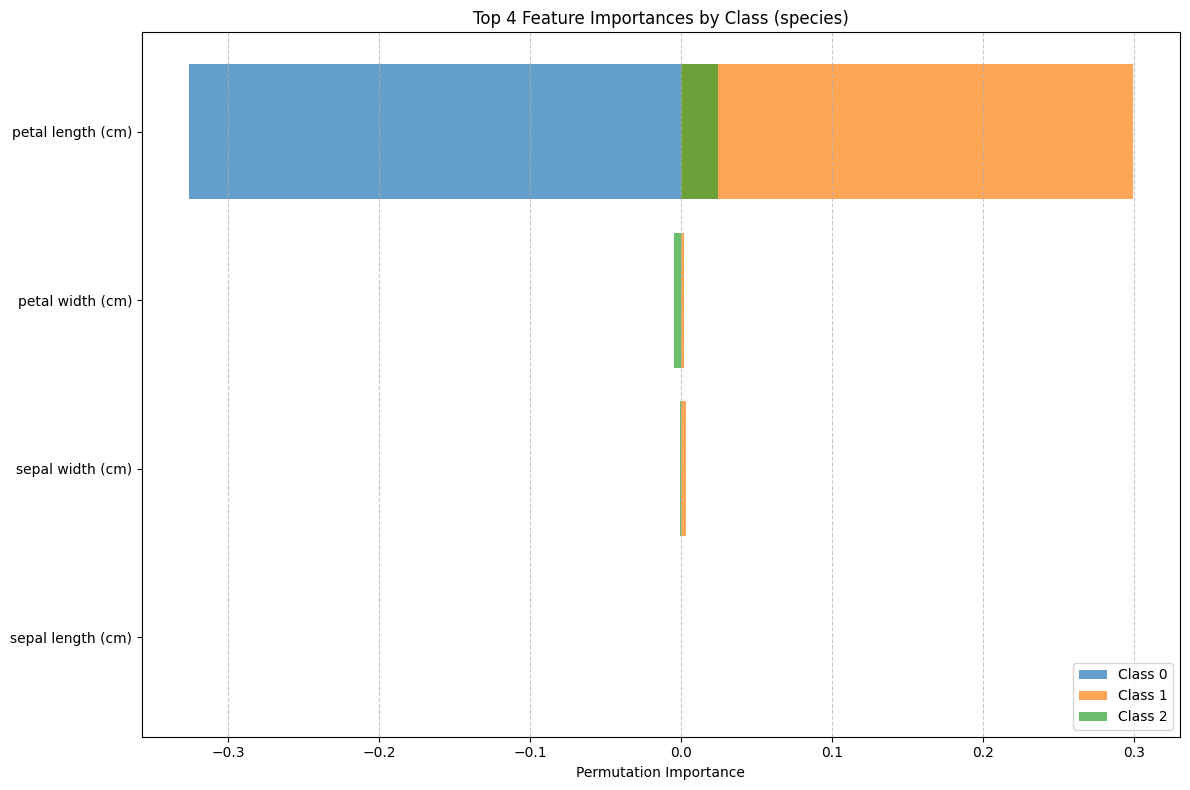

Mappings:

Overfitting detected. Applying dimensionality reduction...
Reduction in model complexity, iteration: 0

Metrics after dimensionality reduction:
Mean test MSE: 3350.94
Mean test MAE: 47.09
Mean test R²: 0.45
Reduction in model complexity, iteration: 1

Metrics after dimensionality reduction:
Mean test MSE: 3557.58
Mean test MAE: 49.17
Mean test R²: 0.43


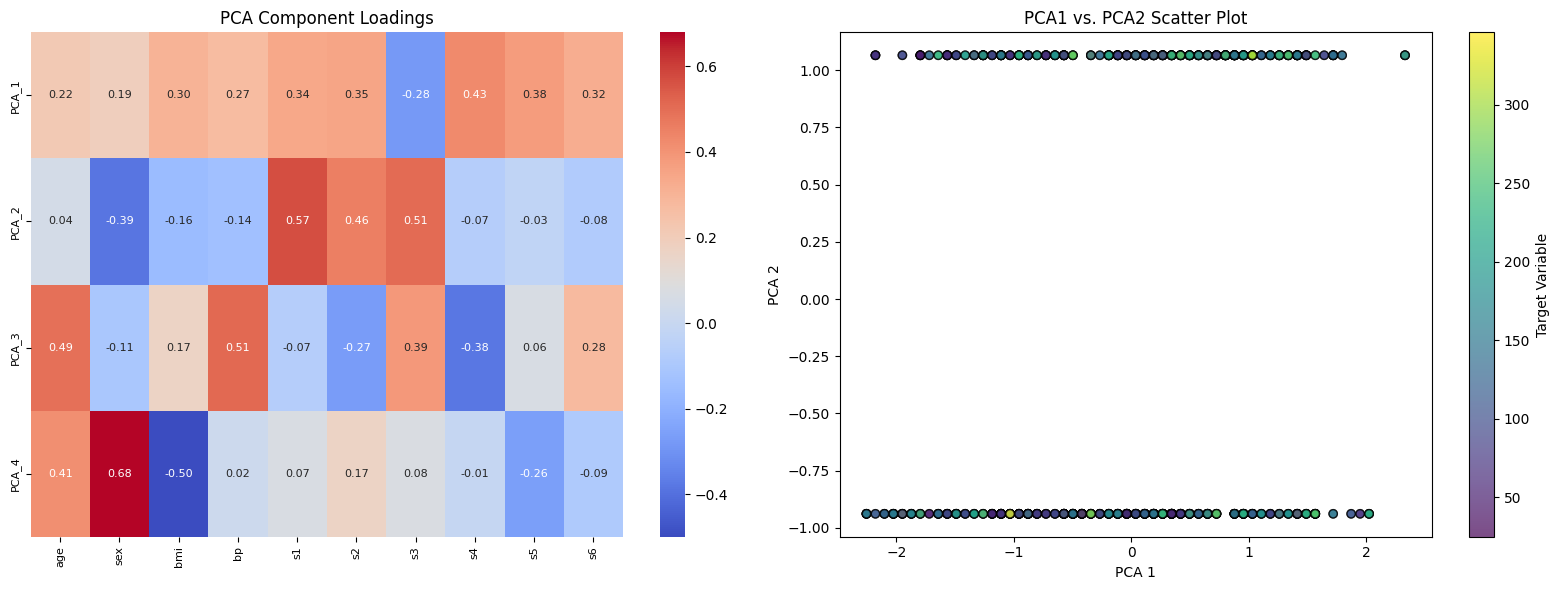

Mean Overall test MSE: 3557.58
Mean Overall test MAE: 49.17
Mean Overall test R²: 0.43
Overall MSE: 3347.69
Overall MAE: 48.23
Overall R²: 0.44

Correlation metrics on test set:
R² (Pearson squared): 0.4615
Spearman coefficient: 0.6587
P-value (Spearman): 0.0000


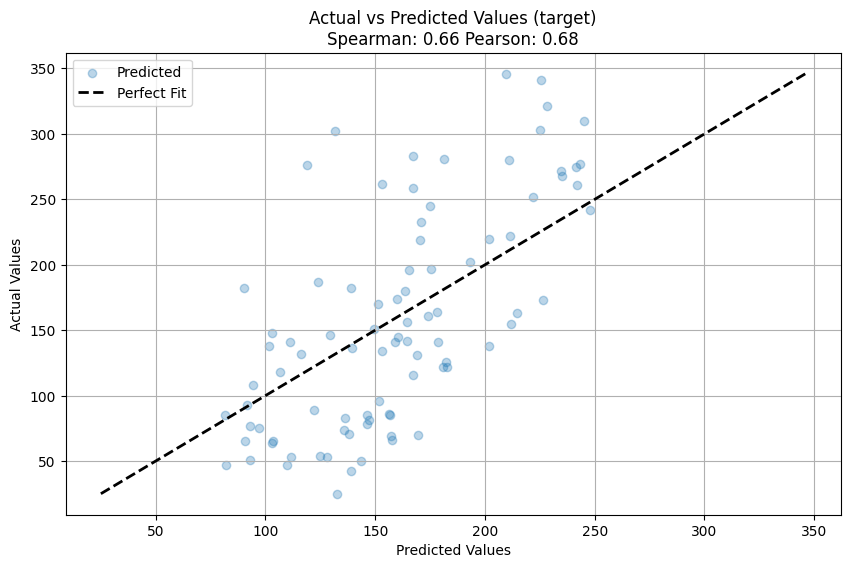

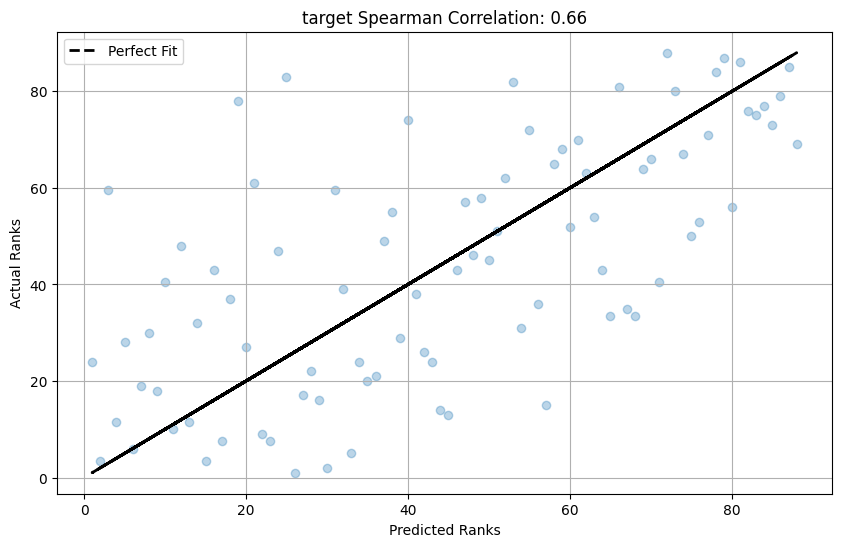

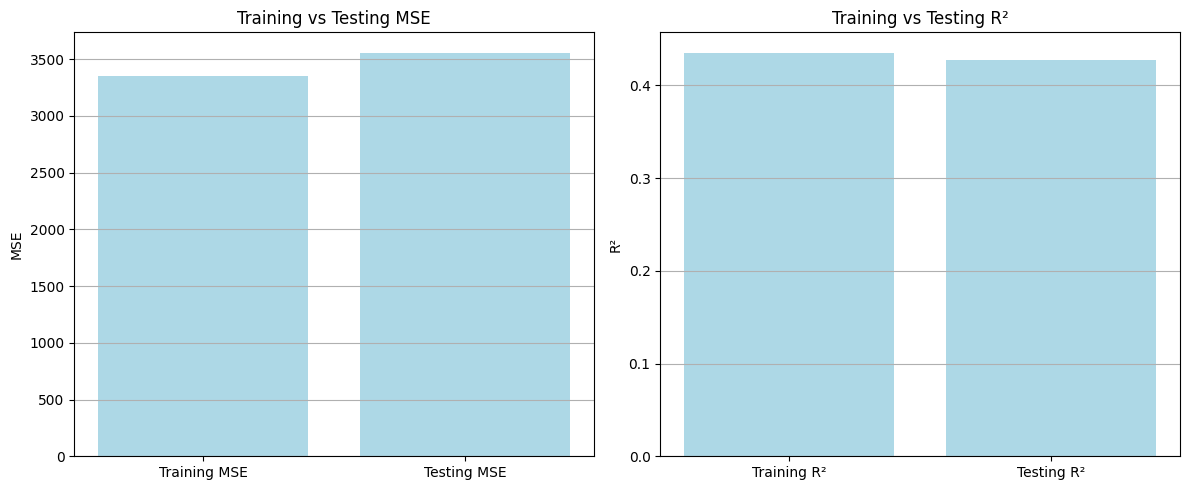

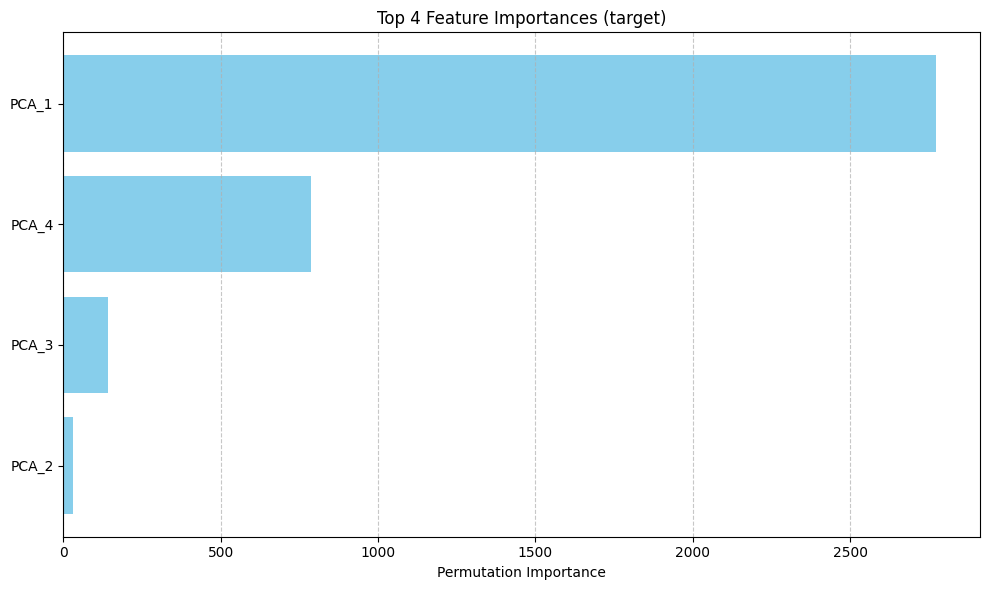

In [11]:

if __name__ == "__main__":
    # Load data
    data_path = '/home/gisam1/non_imaging_data/max_data_slice.csv'
    data = pd.read_csv(data_path)

    # Filter data for the "MDD" group
    data = data[data["Group"] == "MDD"]
    columns_to_remove = []
    
    # Run the model pipeline
    overfit_metric, model = random_forest(
        data,
        tar="DurDep",
        tar_skew=True,
        pred_skew=True,
        columns_to_remove=columns_to_remove,
        identify_predictors=True,
        graphs=True,
        dim_reduce=True
    )

    print("Examining Titanic Dataset: ")
    data = titanic = sns.load_dataset('titanic')

    print(data.columns)
    # Run the model pipeline
    overfit_metric, model = random_forest(
        data,
        tar="survived",
        tar_skew=False,
        pred_skew=False,
        columns_to_remove=["alive"],
        identify_predictors=True,
        graphs=True,
        dim_reduce=False,
        categorical = True
    )

    from sklearn.datasets import load_iris


    # Load Boston Housing dataset
    iris = load_iris()
    data = pd.DataFrame(iris.data, columns=iris.feature_names)
    data['species'] = iris.target
    print(data.columns)
    print(data.shape)

    # Run the model pipeline
    overfit_metric, model = random_forest(
        data,
        tar="species",
        tar_skew=False,
        pred_skew=False,
        columns_to_remove=[],
        identify_predictors=True,
        graphs=True,
        dim_reduce=False,
        categorical=True
    )

    from sklearn.datasets import load_diabetes
    import pandas as pd

    # Load Diabetes dataset
    diabetes = load_diabetes()
    data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
    data['target'] = diabetes.target

    # Run the model pipeline
    overfit_metric, model = random_forest(
        data,
        tar="target",
        tar_skew=True,
        pred_skew=True,
        columns_to_remove=[],
        identify_predictors=True,
        graphs=True,
        dim_reduce=True,
        categorical = False
    )

